In [1]:
# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install required dependencies
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17063, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17063 (delta 21), reused 24 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17063/17063), 15.69 MiB | 27.32 MiB/s, done.
Resolving deltas: 100% (11715/11715), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.3/887.3 kB 16.4 MB/s eta 0:00:00a 0:00:01


In [2]:
!cp /kaggle/input/yolo-dataset/dataset.yaml /kaggle/working/yolov5/

In [10]:
import torch.multiprocessing
torch.multiprocessing.set_start_method('spawn', force=True)
import torch
print(torch.cuda.is_available())  # Should return True

True


In [11]:
!python /kaggle/working/yolov5/train.py --img 416 --batch 32 --epochs 50 --data /kaggle/working/yolov5/dataset.yaml --weights yolov5s.pt
!cp /kaggle/working/yolov5/runs/train/exp/weights/best.pt /kaggle/outputs/best.pt
!cp /kaggle/working/yolov5/runs/train/exp/weights/best.pt /kaggle/input/best.pt

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/yolov5/dataset.yaml, hyp=../data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=../data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=../runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, pa

In [12]:
!cp /kaggle/working/yolov5/runs/train/exp2/weights/best.pt /kaggle/outputs/best.pt

cp: cannot create regular file '/kaggle/outputs/best.pt': No such file or directory
cp: cannot create regular file '/kaggle/input/best.pt': Read-only file system


In [14]:
!cp /kaggle/working/yolov5/runs/train/exp2/weights/best.pt /kaggle/outputs/best.pt


cp: cannot create regular file '/kaggle/outputs/best.pt': No such file or directory


In [15]:
!python /kaggle/working/yolov5/val.py --weights /kaggle/working/yolov5/runs/train/exp2/weights/best.pt --data /kaggle/working/yolov5/dataset.yaml --img 416

val: data=/kaggle/working/yolov5/dataset.yaml, weights=['/kaggle/working/yolov5/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=../runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /kaggle/input/dataset/dataset/labels/val... 6000 images, 0 backgro
val: WARNING ⚠️ Cache directory /kaggle/input/dataset/dataset/labels is not writeable: [Errno 30] Read-only file system: '/kaggle/input/dataset/dataset/labels/val.cache.npy'
                 Class     Images  Instances          P          R      mAP50   
                   all       6000      12000      0.997      0.991      0.994       0.8

In [16]:
!python /kaggle/working/yolov5/detect.py --weights /kaggle/working/yolov5/runs/train/exp2/weights/best.pt --source /kaggle/input/dataset/dataset/images/val/MARS_front_00003.jpg --img 416 --conf 0.5 --save-txt --save-conf

detect: weights=['/kaggle/working/yolov5/runs/train/exp2/weights/best.pt'], source=/kaggle/input/dataset/dataset/images/val/MARS_front_00003.jpg, data=../data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /kaggle/input/dataset/dataset/images/val/MARS_front_00003.jpg: 192x416 1 black, 1 white, 26.8ms
Speed: 0.3ms pre-process, 26.8ms inference, 149.3ms NMS per image at shape (1, 3, 416, 416)
Results saved to ../runs/detect/exp
1 labels saved to

In [23]:
!ls ../runs/detect/exp

MARS_front_00003.jpg  labels


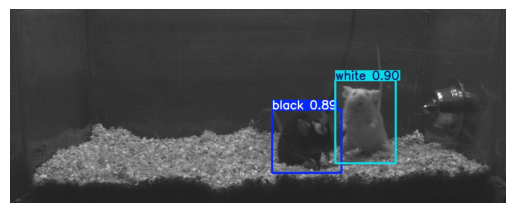

In [24]:

from PIL import Image
import matplotlib.pyplot as plt

# Path to the saved image
saved_image_path = '../runs/detect/exp/MARS_front_00003.jpg'

# Open and display the image
img = Image.open(saved_image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [25]:
!zip -r /kaggle/working/saved_models.zip /kaggle/working


  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/yolov5/ (stored 0%)
  adding: kaggle/working/yolov5/runs/ (stored 0%)
  adding: kaggle/working/yolov5/runs/val/ (stored 0%)
  adding: kaggle/working/yolov5/runs/val/exp/ (stored 0%)
  adding: kaggle/working/yolov5/runs/val/exp/val_batch0_labels.jpg (deflated 19%)
  adding: kaggle/working/yolov5/runs/val/exp/val_batch1_pred.jpg (deflated 19%)
  adding: kaggle/working/yolov5/runs/val/exp/val_batch0_pred.jpg (deflated 19%)
  adding: kaggle/working/yolov5/runs/val/exp/val_batch2_pred.jpg (deflated 19%)
  adding: kaggle/working/yolov5/runs/val/exp/F1_curve.png (deflated 14%)
  adding: kaggle/working/yolov5/runs/val/exp/val_batch1_labels.jpg (deflated 20%)
  adding: kaggle/working/yolov5/runs/val/exp/R_curve.png (deflated 16%)
  adding: kaggle/working/yolov5/runs/val/exp/P_curve.png (deflated 19%)
  adding: kaggle/working/yolov5/runs/val/exp/val_batch2_labels.jpg (deflated 20%)
  adding: kaggle/working/yolov5/runs/val/exp/confusi

In [28]:
!unzip -l /kaggle/working/saved_models.zip


Archive:  /kaggle/working/saved_models.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2024-11-23 22:06   kaggle/working/
        0  2024-11-23 17:00   kaggle/working/yolov5/
        0  2024-11-23 21:58   kaggle/working/yolov5/runs/
        0  2024-11-23 21:56   kaggle/working/yolov5/runs/val/
        0  2024-11-23 21:57   kaggle/working/yolov5/runs/val/exp/
   231370  2024-11-23 21:56   kaggle/working/yolov5/runs/val/exp/val_batch0_labels.jpg
   238705  2024-11-23 21:56   kaggle/working/yolov5/runs/val/exp/val_batch1_pred.jpg
   241289  2024-11-23 21:56   kaggle/working/yolov5/runs/val/exp/val_batch0_pred.jpg
   240949  2024-11-23 21:56   kaggle/working/yolov5/runs/val/exp/val_batch2_pred.jpg
   111508  2024-11-23 21:57   kaggle/working/yolov5/runs/val/exp/F1_curve.png
   230223  2024-11-23 21:56   kaggle/working/yolov5/runs/val/exp/val_batch1_labels.jpg
   100991  2024-11-23 21:57   kaggle/working/yolov5/runs/val/exp/R_curve.png
    95928  2024-11

In [31]:
!ls -lh /kaggle/working/saved_models.zip


-rw-r--r-- 1 root root 192M Nov 23 22:06 /kaggle/working/saved_models.zip


In [32]:
!mkdir -p /kaggle/outputs
!mv /kaggle/working/saved_models.zip /kaggle/outputs/saved_models.zip


In [29]:
from IPython.display import FileLink

FileLink('/kaggle/working/saved_models.zip')



/kaggle/working/saved_models.zip

In [36]:
import torch

# Load the YOLOv5 model
model = torch.hub.load('/kaggle/working/yolov5/', 'custom', path='/kaggle/working/yolov5/runs/train/exp2/weights/best.pt', source='local')

# Run inference on an image
results = model('/kaggle/input/dataset/dataset/images/val/MARS_front_00005.jpg')

# View raw predictions
print(results.xyxy[0])  # Bounding boxes with xyxy format
"""
tensor([[267.72705, 262.47882, 515.70142, 380.35248,   0.84271,   1.00000],
        [214.91513, 218.87527, 336.41714, 353.91800,   0.75990,   0.00000]], device='cuda:0')
"""

YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


tensor([[267.72705, 262.47882, 515.70142, 380.35248,   0.84271,   1.00000],
        [214.91513, 218.87527, 336.41714, 353.91800,   0.75990,   0.00000]], device='cuda:0')


/kaggle/working/yolov5/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [3]:
!python /kaggle/working/yolov5/detect.py --weights /kaggle/input/yolo-model/best.pt --source /kaggle/input/dataset/dataset/images/val --img 416 --conf 0.5 --save-txt --save-conf


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['/kaggle/input/yolo-model/best.pt'], source=/kaggle/input/dataset/dataset/images/val, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-387-g4c904ac7 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 1

In [4]:
!zip -r /kaggle/working/predictions.zip /kaggle/working/yolov5/runs/detect/exp/labels

  adding: kaggle/working/yolov5/runs/detect/exp/labels/ (stored 0%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_top_14584.txt (deflated 35%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_top_11556.txt (deflated 33%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_00515.txt (deflated 30%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_08869.txt (deflated 30%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_13028.txt (deflated 29%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_top_04609.txt (deflated 36%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_11605.txt (deflated 30%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_02324.txt (deflated 27%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_top_14567.txt (deflated 31%)
  adding: kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_04265.txt (deflated 29%)
  adding: kaggle/working/yolov

In [5]:
!mkdir -p /kaggle/outputs
!mv /kaggle/working/predictions.zip /kaggle/outputs/predictions.zip

In [10]:
!unzip -l /kaggle/outputs/predictions.zip


Archive:  /kaggle/outputs/predictions.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2024-11-24 00:30   kaggle/working/yolov5/runs/detect/exp/labels/
       91  2024-11-24 00:30   kaggle/working/yolov5/runs/detect/exp/labels/MARS_top_14584.txt
       92  2024-11-24 00:29   kaggle/working/yolov5/runs/detect/exp/labels/MARS_top_11556.txt
       81  2024-11-24 00:27   kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_00515.txt
       81  2024-11-24 00:28   kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_08869.txt
       80  2024-11-24 00:28   kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_13028.txt
       94  2024-11-24 00:29   kaggle/working/yolov5/runs/detect/exp/labels/MARS_top_04609.txt
       81  2024-11-24 00:28   kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_11605.txt
       75  2024-11-24 00:27   kaggle/working/yolov5/runs/detect/exp/labels/MARS_front_02324.txt
       87  2024-11-24 00:30   kaggle/working/yolov

In [11]:
!ls -lh /kaggle/outputs/predictions.zip


-rw-r--r-- 1 root root 1.9M Nov 24 00:33 /kaggle/outputs/predictions.zip


In [15]:
from IPython.display import FileLink

# Create a download link
FileLink('/kaggle/outputs/predictions.zip')


/kaggle/outputs/predictions.zip

In [17]:
!mv /kaggle/outputs/predictions.zip /kaggle/working/predictions.zip


In [18]:
!ls -lh /kaggle/working/predictions.zip


-rwxrwxrwx 1 root root 1.9M Nov 24 00:33 /kaggle/working/predictions.zip


In [19]:
from IPython.display import FileLink

# Generate a link for the moved file
FileLink('/kaggle/working/predictions.zip')


/kaggle/working/predictions.zip